In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_excel('advertising.csv.xlsx')
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


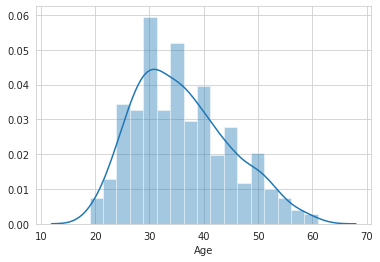

In [0]:
sns.set_style('whitegrid')
sns.distplot(df['Age'])

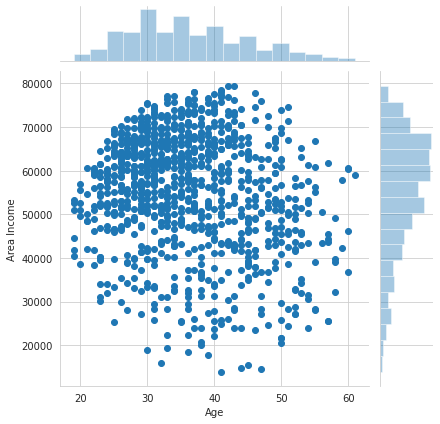

In [0]:
sns.jointplot(x='Age',y='Area Income', data=df)

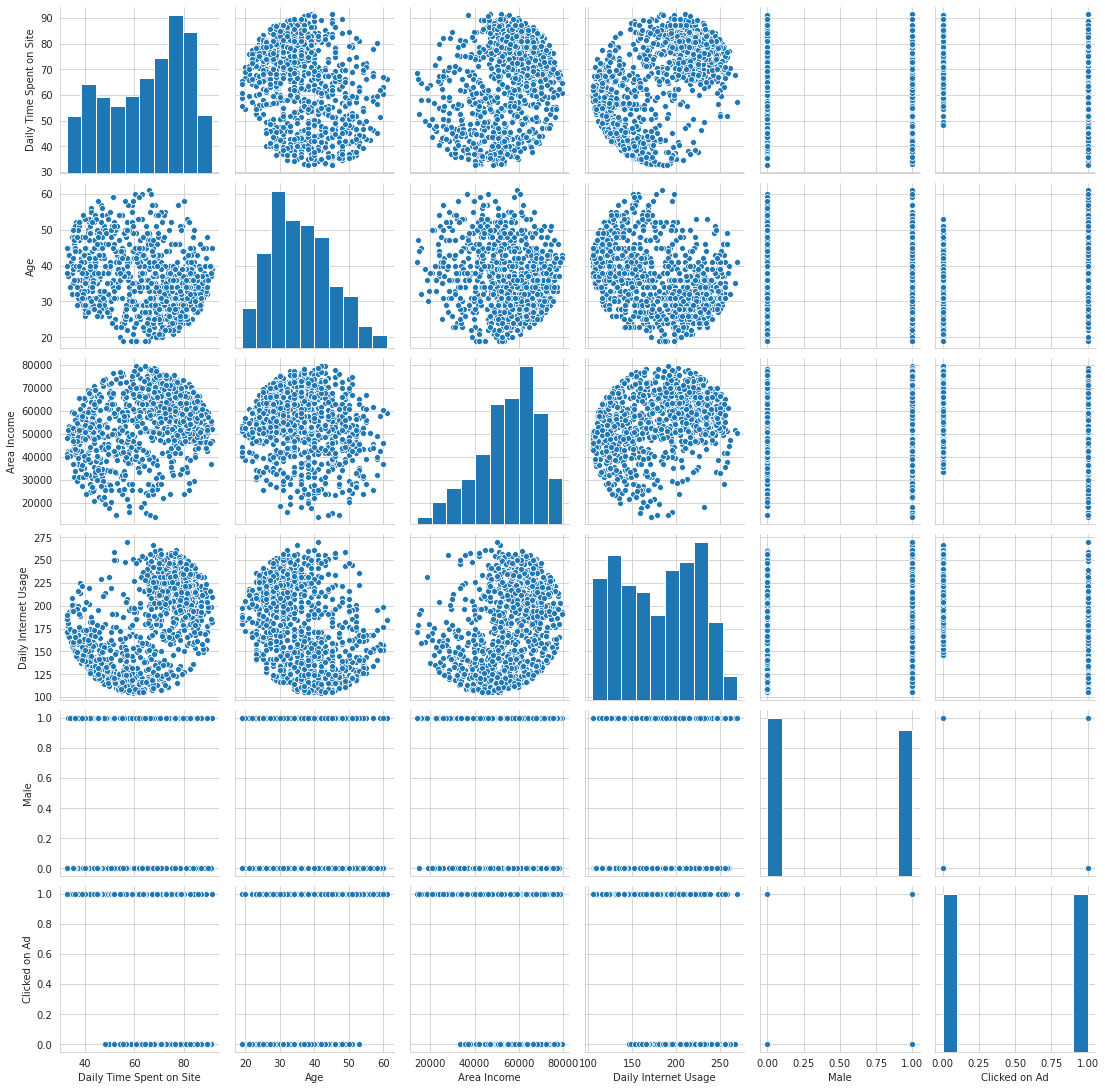

In [0]:
sns.pairplot(df)

In [0]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [0]:
y = df['Clicked on Ad']
x = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [0]:
x_train.shape

(750, 5)

In [0]:
y_train.shape

(750,)

In [0]:
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = log.predict(x_test)
predictions

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1])

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
confusion_matrix(y_test, predictions)

array([[113,   1],
       [ 20, 116]])

In [0]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       114
           1       0.99      0.85      0.92       136

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



In [0]:
pd.DataFrame({'Coef': log.coef_[0]}, x.columns)

,Coef
Daily Time Spent on Site,-0.054184
Age,0.249518
Area Income,-0.000020
Daily Internet Usage,-0.023712
Male,0.002009


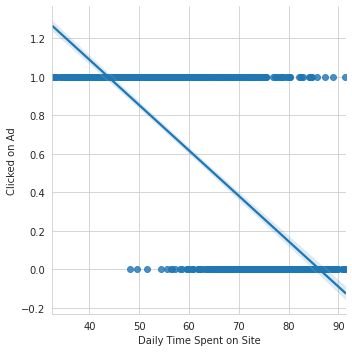

In [0]:
sns.lmplot(x='Daily Time Spent on Site',y='Clicked on Ad', data=df)

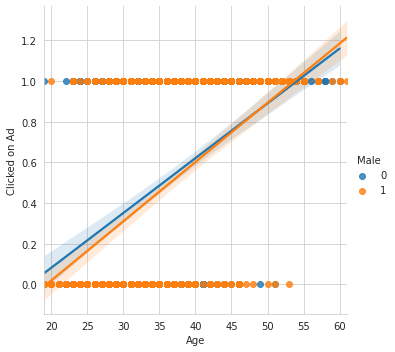

In [0]:
sns.lmplot(x='Age',y='Clicked on Ad', hue='Male', data=df)